# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


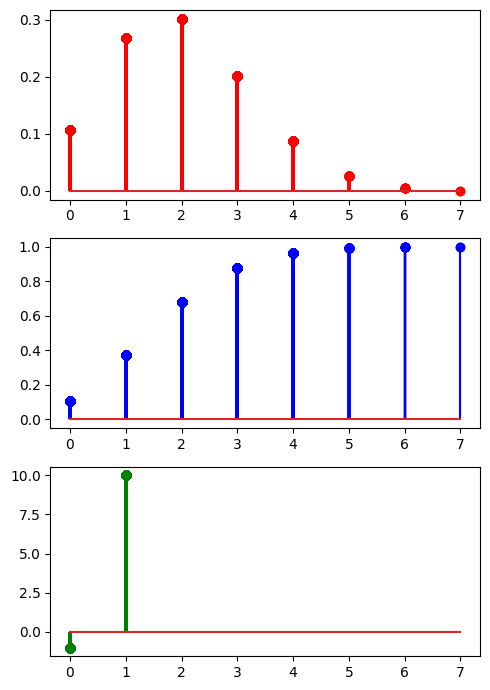

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1
Escriba las funciones anteriores pero para distribuciones normales y uniformes.


### Distribuciones normales

In [4]:
from scipy.stats import norm

def dnorm(x, mean=0, std=1):
    """
    Calcula la función de densidad de probabilidad (PDF) de la distribución normal.
    """
    result = norm.pdf(x, loc=mean, scale=std)
    return result

def pnorm(q, mean=0, std=1):
    """
    Calcula la función de distribución acumulativa (CDF) de la distribución normal.
    """
    result = norm.cdf(q, loc=mean, scale=std)
    return result

def qnorm(p, mean=0, std=1):
    """
    Calcula la función cuantil (inversa de la CDF) de la distribución normal.
    """
    result = norm.ppf(p, loc=mean, scale=std)
    return result

def rnorm(n, mean=0, std=1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(loc=mean, scale=std, size=n)
    return result

In [12]:
np.random.seed(42)

mean = 0  # Media
std = 1   # Desviación estándar

print(f"Probabilidad de densidad en x = 0.5: {dnorm(0.5, mean=mean, std=std)}")

print(f"Probabilidad de que X <= 1: {pnorm(1, mean=mean, std=std)}")

print(f"Value of x such that P(X <= x) = 0.9: {qnorm(0.9, mean=mean, std=std)}")

random_values = rnorm(2000, mean=mean, std=std)
print(f"Generar 2000 valores aleatorios desde la Normal({mean}, {std}) distribucion: {random_values}")

Probabilidad de densidad en x = 0.5: 0.3520653267642995
Probabilidad de que X <= 1: 0.8413447460685429
Value of x such that P(X <= x) = 0.9: 1.2815515655446004
Generar 2000 valores aleatorios desde la Normal(0, 1) distribucion: [ 0.49671415 -0.1382643   0.64768854 ... -0.88187465 -0.16306696
 -0.74490264]


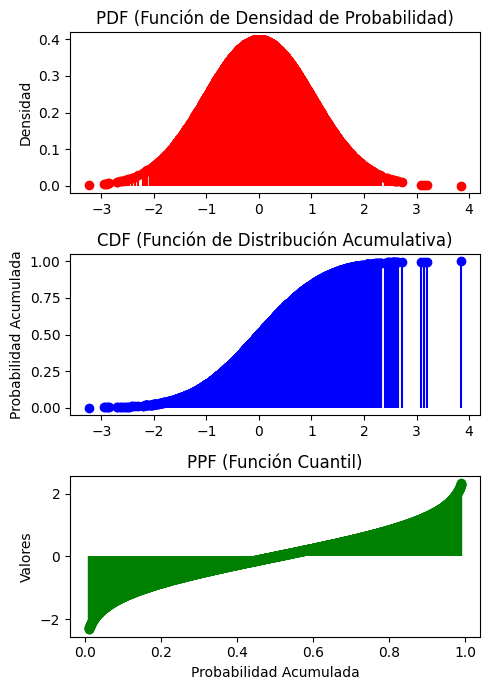

In [14]:
np.random.seed(42)

mean = 0  # Media
std = 1   # Desviación estándar

# Generar 2000 valores aleatorios a partir de una distribución normal
data = rnorm(2000, mean=mean, std=std)

# Calcular la PDF, CDF y PPF para los datos generados
pdf = dnorm(data, mean=mean, std=std)
cdf = pnorm(data, mean=mean, std=std)
ppf = qnorm(np.linspace(0.01, 0.99, len(data)), mean=mean, std=std)  # Usamos valores entre 0.01 y 0.99 para evitar infinitos

fig, axis = plt.subplots(3, 1, figsize=(5, 7))

# Graficar PDF
axis[0].stem(data, pdf, "r-", markerfmt="ro", linefmt="r-", basefmt=" ")
axis[0].set_title("PDF (Función de Densidad de Probabilidad)")
axis[0].set_ylabel("Densidad")

# Graficar CDF
axis[1].stem(data, cdf, "b-", markerfmt="bo", linefmt="b-", basefmt=" ")
axis[1].set_title("CDF (Función de Distribución Acumulativa)")
axis[1].set_ylabel("Probabilidad Acumulada")

# Grafica PPF
axis[2].stem(np.linspace(0.01, 0.99, len(data)), ppf, "g-", markerfmt="go", linefmt="g-", basefmt=" ")
axis[2].set_title("PPF (Función Cuantil)")
axis[2].set_xlabel("Probabilidad Acumulada")
axis[2].set_ylabel("Valores")

plt.tight_layout()
plt.show()

### Distribuciones uniformes

In [11]:
from scipy.stats import uniform

def dunif(x, low=0, high=1):
    """
    Calcula la función de densidad de probabilidad (PDF) de la distribución uniforme.
    """
    result = uniform.pdf(x, loc=low, scale=high-low)
    return result

def punif(q, low=0, high=1):
    """
    Calcula la función de distribución acumulativa (CDF) de la distribución uniforme.
    """
    result = uniform.cdf(q, loc=low, scale=high-low)
    return result

def qunif(p, low=0, high=1):
    """
    Calcula la función cuantil (inversa de la CDF) de la distribución uniforme.
    """
    result = uniform.ppf(p, loc=low, scale=high-low)
    return result

def runif(n, low=0, high=1):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    result = uniform.rvs(loc=low, scale=high-low, size=n)
    return result

In [13]:
np.random.seed(42)

low = 0  # Límite inferior
high = 1  # Límite superior

print(f"ProbabilidaD de densidad en x = 0.5: {dunif(0.5, low=low, high=high)}")

print(f"Probabilidad de queX <= 0.7: {punif(0.7, low=low, high=high)}")

print(f"Value of x such that P(X <= x) = 0.9: {qunif(0.9, low=low, high=high)}")

random_values = runif(2000, low=low, high=high)
print(f"Generar 2000 valores aleatorios desde una distribucion uniformr({low}, {high}) distribution: {random_values[:10]}")  # Mostrar solo los primeros 10 valores

ProbabilidaD de densidad en x = 0.5: 1.0
Probabilidad de queX <= 0.7: 0.7
Value of x such that P(X <= x) = 0.9: 0.9
Generar 2000 valores aleatorios desde una distribucion uniformr(0, 1) distribution: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


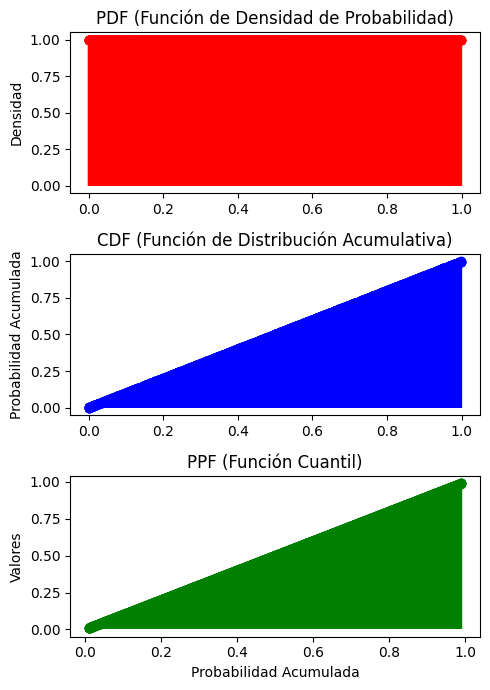

In [15]:
# Generar datos aleatorios
data = runif(2000, low=low, high=high)

# Calcular la PDF, CDF y PPF para los datos generados
pdf = dunif(data, low=low, high=high)
cdf = punif(data, low=low, high=high)
ppf = qunif(np.linspace(0.01, 0.99, len(data)), low=low, high=high)  # Usamos valores entre 0.01 y 0.99 para evitar problemas en los extremos


fig, axis = plt.subplots(3, 1, figsize=(5, 7))

# Graficar la PDF
axis[0].stem(data, pdf, "r-", markerfmt="ro", linefmt="r-", basefmt=" ")
axis[0].set_title("PDF (Función de Densidad de Probabilidad)")
axis[0].set_ylabel("Densidad")

# Graficar la CDF
axis[1].stem(data, cdf, "b-", markerfmt="bo", linefmt="b-", basefmt=" ")
axis[1].set_title("CDF (Función de Distribución Acumulativa)")
axis[1].set_ylabel("Probabilidad Acumulada")

# Graficar la PPF
axis[2].stem(np.linspace(0.01, 0.99, len(data)), ppf, "g-", markerfmt="go", linefmt="g-", basefmt=" ")
axis[2].set_title("PPF (Función Cuantil)")
axis[2].set_xlabel("Probabilidad Acumulada")
axis[2].set_ylabel("Valores")

plt.tight_layout()
plt.show()